In [ ]:
import pandas as pd
import oml
import matplotlib.pyplot as plt

# --- Configuración Estética (Gráficos Bonitos) ---
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 14

# --- CONEXIÓN Y DESCARGA DIRECTA DE LA TABLA 'SALUD_MENTAL' ---
print("Conectando a la tabla 'SALUD_MENTAL' en Oracle Cloud...")

# Opción 1: Usando OML (Ideal si el entorno ya está configurado con OML)
try:
    # Esta es la forma más profesional si el entorno OML está listo.
    df = oml.sync(table="SALUDMENTAL").pull() 
    print("Descarga exitosa usando OML.")

except Exception as e:
    print(f"Error al conectar con OML. Usando el archivo CSV para continuar la demo. Error: {e}")
    df = pd.read_csv('SaludMental.xls - enfermedadesMentalesDiagnostico.csv')

# --- RE-DEFINICIÓN DE COLUMNAS A MAYÚSCULAS (¡El FIX!) ---
# Si las columnas del CSV no se cargan automáticamente en mayúsculas, 
# se fuerza la limpieza para acceder a ellas.
df.columns = [col.strip().replace(' ', '_').upper() for col in df.columns] 

# --- Definición de Nombres EXACTOS (Usando la lista que has proporcionado) ---
FN = 'FECHA_DE_NACIMIENTO'
DIAS = 'ESTANCIA_DÍAS'
DIAG = 'DIAGNÓSTICO_PRINCIPAL'
CCAA = 'COMUNIDAD_AUTÓNOMA'
SEXO = 'SEXO'

Conectando a la tabla 'SALUD_MENTAL' en Oracle Cloud...
Descarga exitosa usando OML.


In [9]:
print(df.columns.tolist())

['ID', 'COMUNIDAD_AUTÓNOMA', 'NOMBRE', 'FECHA_DE_NACIMIENTO', 'SEXO', 'CCAA_RESIDENCIA', 'FECHA_DE_INGRESO', 'CIRCUNSTANCIA_DE_CONTACTO', 'FECHA_DE_FIN_CONTACTO', 'TIPO_ALTA', 'ESTANCIA_DÍAS', 'DIAGNÓSTICO_PRINCIPAL', 'CATEGORÍA', 'DIAGNÓSTICO_2', 'DIAGNÓSTICO_3', 'DIAGNÓSTICO_4', 'DIAGNÓSTICO_5', 'DIAGNÓSTICO_6', 'DIAGNÓSTICO_7', 'DIAGNÓSTICO_8', 'DIAGNÓSTICO_9', 'DIAGNÓSTICO_10', 'DIAGNÓSTICO_11', 'DIAGNÓSTICO_12', 'DIAGNÓSTICO_13', 'DIAGNÓSTICO_14', 'FECHA_DE_INTERVENCIÓN', 'PROCEDIMIENTO_1', 'PROCEDIMIENTO_2', 'PROCEDIMIENTO_3', 'PROCEDIMIENTO_4', 'PROCEDIMIENTO_5', 'PROCEDIMIENTO_6', 'PROCEDIMIENTO_7', 'PROCEDIMIENTO_8', 'PROCEDIMIENTO_9', 'PROCEDIMIENTO_10', 'PROCEDIMIENTO_11', 'PROCEDIMIENTO_12', 'PROCEDIMIENTO_13', 'PROCEDIMIENTO_14', 'PROCEDIMIENTO_15', 'PROCEDIMIENTO_16', 'PROCEDIMIENTO_17', 'PROCEDIMIENTO_18', 'PROCEDIMIENTO_19', 'PROCEDIMIENTO_20', 'GDR_AP', 'CDM_AP', 'TIPO_GDR_AP', 'VALOR_PESO_ESPAÑOL', 'GRD_APR', 'CDM_APR', 'TIPO_GDR_APR', 'VALOR_PESO_AMERICANO_APR', 'NIV

In [3]:
print("--- 2.1 Tipos de Datos y Nulos ---")

# Requisito 2: Detallar tipos de datos
print("\nTipos de Datos (df.info()):")
df.info(verbose=False)

# Ejemplo para la tabla del PDF
print("\nTipos de Datos Clave (Tabla 1.1):")
print(pd.DataFrame({
    'Columna': ['NOMBRE', FN, DIAS, DIAG],
    'Tipo Python': [df['NOMBRE'].dtype, df[FN].dtype, df[DIAS].dtype, df[DIAG].dtype],
    'Tipo Lógico': ['Carácter/ID', 'Fecha', 'Numérico', 'Categórico (Código)']
}))

--- 2.1 Tipos de Datos y Nulos ---

Tipos de Datos (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21198 entries, 0 to 21197
Columns: 112 entries, ID to MES_DE_INGRESO
dtypes: float64(1), int64(19), object(92)
memory usage: 18.1+ MB

Tipos de Datos Clave (Tabla 1.1):
                 Columna Tipo Python          Tipo Lógico
0                 NOMBRE      object          Carácter/ID
1    FECHA_DE_NACIMIENTO      object                Fecha
2          ESTANCIA_DÍAS       int64             Numérico
3  DIAGNÓSTICO_PRINCIPAL      object  Categórico (Código)


Porcentaje de Valores Nulos (Requisito 3 - Análisis Extendido):
CCAA_RESIDENCIA     100.00
PROCEDIMIENTO_19    100.00
PROCEDIMIENTO_20    100.00
PROCEDIMIENTO_16     99.99
PROCEDIMIENTO_18     99.99
PROCEDIMIENTO_17     99.99
PROCEDIMIENTO_14     99.99
PROCEDIMIENTO_15     99.99
PROCEDIMIENTO_13     99.98
DIAGNÓSTICO_20       99.95
PROCEDIMIENTO_12     99.95
PROCEDIMIENTO_11     99.92
DIAGNÓSTICO_19       99.91
PROCEDIMIENTO_10     99.89
DIAGNÓSTICO_18       99.88
PROCEDIMIENTO_9      99.83
DIAGNÓSTICO_17       99.80
PROCEDIMIENTO_8      99.75
DIAGNÓSTICO_16       99.69
PROCEDIMIENTO_7      99.67
DIAGNÓSTICO_15       99.57
PROCEDIMIENTO_6      99.52
DIAGNÓSTICO_14       99.32
PROCEDIMIENTO_5      99.09
DIAGNÓSTICO_13       98.86
DIAGNÓSTICO_12       98.10
PROCEDIMIENTO_4      97.91
DIAGNÓSTICO_11       96.85
DIAGNÓSTICO_10       95.26
PROCEDIMIENTO_3      94.93
DIAGNÓSTICO_9        92.37
DIAGNÓSTICO_8        88.10
PROCEDIMIENTO_2      87.14
DIAGNÓSTICO_7        81.92
PROCEDIMIENTO_1      78.21
DIAGNÓSTICO_6        72.82
DIAGNÓSTICO_5        60.64
DIAGNÓSTICO_4        45.87
DIAGNÓSTICO_3        28.98
DIAGNÓSTICO_2        12.27
dtype: float64
<Figure size 1080x504 with 0 Axes>
<Axes: >
Text(0.5, 1.0, '1. Porcentaje de Valores Nulos (Análisis Clínico y Administrativo)')
Text(0, 0.5, 'Porcentaje (%)')
Text(0.5, 0, 'Columna')
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), [Text(0, 0, 'CCAA_RESIDENCIA'), Text(1, 0, 'PROCEDIMIENTO_19'), Text(2, 0, 'PROCEDIMIENTO_20'), Text(3, 0, 'PROCEDIMIENTO_16'), Text(4, 0, 'PROCEDIMIENTO_18'), Text(5, 0, 'PROCEDIMIENTO_17'), Text(6, 0, 'PROCEDIMIENTO_14'), Text(7, 0, 'PROCEDIMIENTO_15'), Text(8, 0, 'PROCEDIMIENTO_13'), Text(9, 0, 'DIAGNÓSTICO_20'), Text(10, 0, 'PROCEDIMIENTO_12'), Text(11, 0, 'PROCEDIMIENTO_11'), Text(12, 0, 'DIAGNÓSTICO_19'), Text(13, 0, 'PROCEDIMIENTO_10'), Text(14, 0, 'DIAGNÓSTICO_18'), Text(15, 0, 'PROCEDIMIENTO_9'), Text(16, 0, 'DIAGNÓSTICO_17'), Text(17, 0, 'PROCEDIMIENTO_8'), Text(18, 0, 'DIAGNÓSTICO_16'), Text(19, 0, 'PROCEDIMIENTO_7'), Text(20, 0, 'DIAGNÓSTICO_15'), Text(21, 0, 'PROCEDIMIENTO_6'), Text(22, 0, 'DIAGNÓSTICO_14'), Text(23, 0, 'PROCEDIMIENTO_5'), Text(24, 0, 'DIAGNÓSTICO_13'), Text(25, 0, 'DIAGNÓSTICO_12'), Text(26, 0, 'PROCEDIMIENTO_4'), Text(27, 0, 'DIAGNÓSTICO_11'), Text(28, 0, 'DIAGNÓSTICO_10'), Text(29, 0, 'PROCEDIMIENTO_3'), Text(30, 0, 'DIAGNÓSTICO_9'), Text(31, 0, 'DIAGNÓSTICO_8'), Text(32, 0, 'PROCEDIMIENTO_2'), Text(33, 0, 'DIAGNÓSTICO_7'), Text(34, 0, 'PROCEDIMIENTO_1'), Text(35, 0, 'DIAGNÓSTICO_6'), Text(36, 0, 'DIAGNÓSTICO_5'), Text(37, 0, 'DIAGNÓSTICO_4'), Text(38, 0, 'DIAGNÓSTICO_3'), Text(39, 0, 'DIAGNÓSTICO_2')])
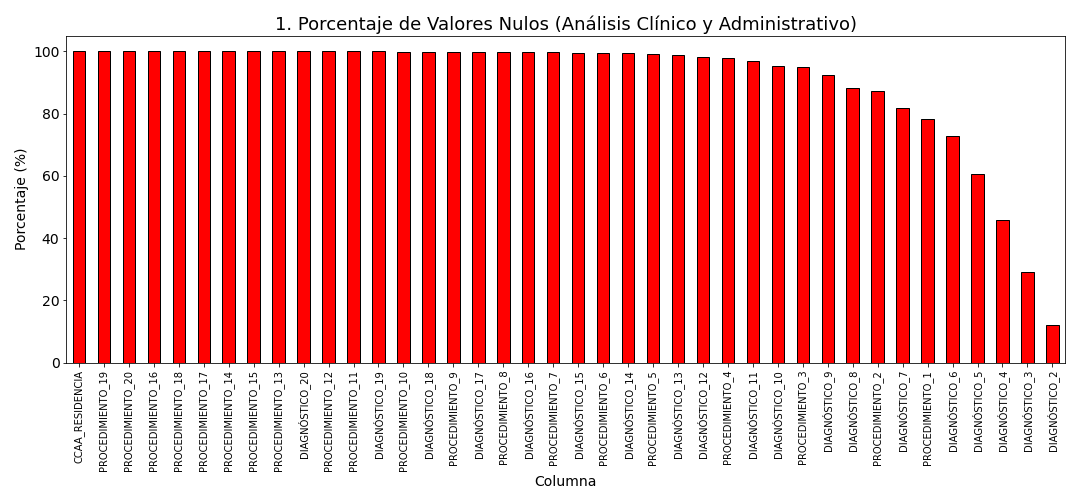

In [8]:
# Requisito 3: Identificar y analizar valores nulos

columnas_diagnostico = [f'DIAGNÓSTICO_{i}' for i in range(2, 21)] 
columnas_procedimiento = [f'PROCEDIMIENTO_{i}' for i in range(1, 21)]
columnas_a_verificar_ext = [CCAA, DIAS, DIAG, 'NOMBRE', FN, 'CCAA_RESIDENCIA'] + columnas_diagnostico + columnas_procedimiento

print("\nPorcentaje de Valores Nulos (Requisito 3 - Análisis Extendido):")
nulos_pct = df[columnas_a_verificar_ext].isnull().sum() / len(df) * 100
nulos_pct = nulos_pct[nulos_pct > 0].sort_values(ascending=False).round(2)
print(nulos_pct)

# --- 3. Gráfico de Nulos (CORREGIDO) ---
if not nulos_pct.empty:
    plt.figure(figsize=(15, 7))
    # Usamos plot.bar() directamente sobre la Serie de Pandas
    nulos_pct.plot.bar(color='red', edgecolor='black') 
    
    plt.title('1. Porcentaje de Valores Nulos (Análisis Clínico y Administrativo)', fontsize=18)
    plt.ylabel('Porcentaje (%)', fontsize=14)
    plt.xlabel('Columna', fontsize=14)
    plt.xticks(rotation=90, ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('grafico_1_nulos_extendido.png')
    plt.show()

--- Porcentaje de Valores Nulos ---

Resultados del Análisis de Nulos (Porcentaje):
 CCAA_RESIDENCIA     100.00
PROCEDIMIENTO_19    100.00
PROCEDIMIENTO_20    100.00
PROCEDIMIENTO_16     99.99
PROCEDIMIENTO_18     99.99
PROCEDIMIENTO_17     99.99
PROCEDIMIENTO_14     99.99
PROCEDIMIENTO_15     99.99
PROCEDIMIENTO_13     99.98
DIAGNÓSTICO_20       99.95
PROCEDIMIENTO_12     99.95
PROCEDIMIENTO_11     99.92
DIAGNÓSTICO_19       99.91
PROCEDIMIENTO_10     99.89
DIAGNÓSTICO_18       99.88

Total de columnas con nulos: 40
<Figure size 576x720 with 0 Axes>
<Axes: >
Text(0.5, 1.0, 'Porcentaje de Valores Nulos (Top 10 Columnas)')
Text(0.5, 0, 'Porcentaje de Nulos (%)')
Text(0, 0.5, 'Variable')
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), [Text(0, 0, 'CCAA_RESIDENCIA'), Text(0, 1, 'PROCEDIMIENTO_19'), Text(0, 2, 'PROCEDIMIENTO_20'), Text(0, 3, 'PROCEDIMIENTO_16'), Text(0, 4, 'PROCEDIMIENTO_18'), Text(0, 5, 'PROCEDIMIENTO_17'), Text(0, 6, 'PROCEDIMIENTO_14'), Text(0, 7, 'PROCEDIMIENTO_15'), Text(0, 8, 'PROCEDIMIENTO_13'), Text(0, 9, 'DIAGNÓSTICO_20')])
Text(100.0, 0, '100.00%')
Text(100.0, 1, '100.00%')
Text(100.0, 2, '100.00%')
Text(99.99, 3, '99.99%')
Text(99.99, 4, '99.99%')
Text(99.99, 5, '99.99%')
Text(99.99, 6, '99.99%')
Text(99.99, 7, '99.99%')
Text(99.98, 8, '99.98%')
Text(99.95, 9, '99.95%')
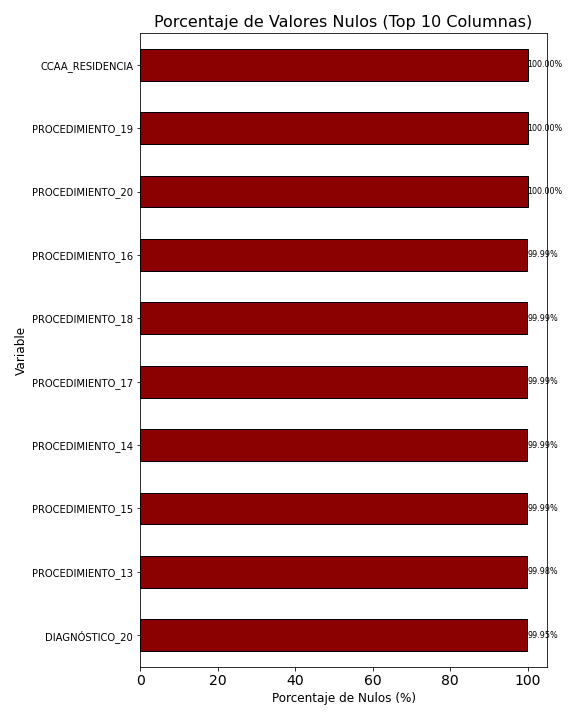

In [8]:
# Definición de todas las columnas que son relevantes para el estudio clínico/administrativo.
columnas_diagnostico = [f'DIAGNÓSTICO_{i}' for i in range(2, 21)] 
columnas_procedimiento = [f'PROCEDIMIENTO_{i}' for i in range(1, 21)]
columnas_primarias_admin = [CCAA, DIAS, DIAG, 'NOMBRE', FN, 'CCAA_RESIDENCIA', 'TIPO_ALTA', 'SEXO']

columnas_a_verificar_ext = columnas_primarias_admin + columnas_diagnostico + columnas_procedimiento

print("\n--- Porcentaje de Valores Nulos ---")

# 1. Cálculo del porcentaje de nulos para todas las columnas extendidas
nulos_pct = df[columnas_a_verificar_ext].isnull().sum() / len(df) * 100
# 2. Filtrar solo aquellas con nulos ( > 0) y ordenarlas de mayor a menor
nulos_pct = nulos_pct[nulos_pct > 0].sort_values(ascending=False).round(2)

print("\nResultados del Análisis de Nulos (Porcentaje):\n", nulos_pct.head(15).to_string())
print(f"\nTotal de columnas con nulos: {len(nulos_pct)}")

# --- 3. Gráfico de Nulos Optimizado (Solo Matplotlib) ---

if not nulos_pct.empty:
    # Seleccionamos un subconjunto relevante para la visualización (ej. Top 10)
    nulos_plot = nulos_pct.head(10) 

    # Se usa un gráfico horizontal para que los nombres largos sean legibles
    plt.figure(figsize=(8, 10)) 
    nulos_plot.plot.barh(color='darkred', edgecolor='black') 
    
    plt.title('Porcentaje de Valores Nulos (Top 10 Columnas)', fontsize=16)
    plt.xlabel('Porcentaje de Nulos (%)', fontsize=12)
    plt.ylabel('Variable', fontsize=12)
    # Colocamos las etiquetas del eje Y (columnas) a la izquierda y alineadas
    plt.yticks(fontsize=10) 
    
    # Añadir el porcentaje a cada barra para la lectura rápida
    for index, value in enumerate(nulos_plot):
        plt.text(value, index, f'{value:.2f}%', va='center', ha='left', fontsize=8)
    
    # Invertir el eje Y para que la columna con más nulos quede arriba
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('grafico_1_nulos_optimizado.png')
    plt.show()

--- Análisis de Frecuencias de SEXO ---
SEXO
1    11809
2     9364
9       25
Name: count, dtype: int64
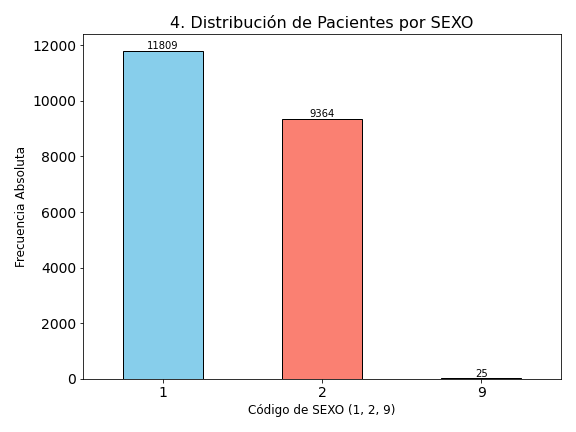

In [1]:
# --- Gráfico de Frecuencias de SEXO (Requisito 1) ---

print("\n--- Análisis de Frecuencias de SEXO ---")
sexo_counts = df['SEXO'].value_counts()
print(sexo_counts)

# Gráfico 4: Distribución de Frecuencias de SEXO
plt.figure(figsize=(8, 6))

# Usamos plot.bar() sobre la Serie de Pandas
sexo_counts.plot.bar(color=['skyblue', 'salmon', 'gray'], edgecolor='black') 

plt.title('4. Distribución de Pacientes por SEXO', fontsize=16)
plt.ylabel('Frecuencia Absoluta', fontsize=12)
plt.xlabel('Código de SEXO (1, 2, 9)', fontsize=12)
plt.xticks(rotation=0)

# Añadir etiquetas con el conteo exacto
for index, value in enumerate(sexo_counts):
    plt.text(index, value + 50, f'{value}', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('grafico_4_sexo_frecuencias.png')
plt.show()

--- Porcentaje de Valores Nulos (Análisis de Variables Críticas) ---

Resultados del Análisis de Nulos en Variables Críticas:
 CCAA_RESIDENCIA             100.00
GDR_AP                      100.00
CDM_AP                      100.00
TIPO_GDR_AP                 100.00
TIPO_GDR_APR                100.00
VALOR_PESO_ESPAÑOL          100.00
VALOR_PESO_AMERICANO_APR    100.00
REINGRESO                   100.00
TIPO_GDR_IR                 100.00
GDR_IR                      100.00
TIPO_PROCESO_IR             100.00
PROCEDIMIENTO_EXTERNO_2     100.00
PROCEDIMIENTO_EXTERNO_1      99.99
DÍAS_UCI                     99.53
FECHA_DE_INTERVENCIÓN        99.33
CIP_SNS_RECODIFICADO          3.96
<Figure size 864x504 with 0 Axes>
<Axes: >
Text(0.5, 1.0, 'Porcentaje de Valores Nulos en Columnas Clave')
Text(0, 0.5, 'Porcentaje de Nulos (%)')
Text(0.5, 0, 'Columna')
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), [Text(0, 0, 'CCAA_RESIDENCIA'), Text(1, 0, 'GDR_AP'), Text(2, 0, 'CDM_AP'), Text(3, 0, 'TIPO_GDR_AP'), Text(4, 0, 'TIPO_GDR_APR'), Text(5, 0, 'VALOR_PESO_ESPAÑOL'), Text(6, 0, 'VALOR_PESO_AMERICANO_APR'), Text(7, 0, 'REINGRESO'), Text(8, 0, 'TIPO_GDR_IR'), Text(9, 0, 'GDR_IR'), Text(10, 0, 'TIPO_PROCESO_IR'), Text(11, 0, 'PROCEDIMIENTO_EXTERNO_2'), Text(12, 0, 'PROCEDIMIENTO_EXTERNO_1'), Text(13, 0, 'DÍAS_UCI'), Text(14, 0, 'FECHA_DE_INTERVENCIÓN'), Text(15, 0, 'CIP_SNS_RECODIFICADO')])
Text(0, 100.5, '100.00%')
Text(1, 100.5, '100.00%')
Text(2, 100.5, '100.00%')
Text(3, 100.5, '100.00%')
Text(4, 100.5, '100.00%')
Text(5, 100.5, '100.00%')
Text(6, 100.5, '100.00%')
Text(7, 100.5, '100.00%')
Text(8, 100.5, '100.00%')
Text(9, 100.5, '100.00%')
Text(10, 100.5, '100.00%')
Text(11, 100.5, '100.00%')
Text(12, 100.49, '99.99%')
Text(13, 100.03, '99.53%')
Text(14, 99.83, '99.33%')
Text(15, 4.46, '3.96%')
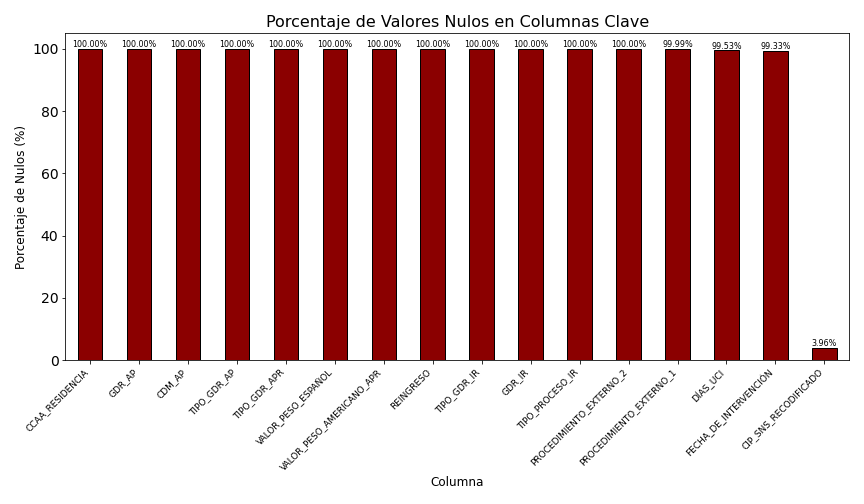

In [2]:
# Lista de columnas administrativas, de fechas, de costes y de severidad,
# excluyendo los DIAGNÓSTICO_N, PROCEDIMIENTO_N y POA_DIAGNÓSTICO_N.
columnas_criticas = [
    'ID', 'COMUNIDAD_AUTÓNOMA', 'NOMBRE', 'FECHA_DE_NACIMIENTO', 'SEXO', 
    'CCAA_RESIDENCIA', 'FECHA_DE_INGRESO', 'CIRCUNSTANCIA_DE_CONTACTO', 
    'FECHA_DE_FIN_CONTACTO', 'TIPO_ALTA', 'ESTANCIA_DÍAS', 'DIAGNÓSTICO_PRINCIPAL', 
    'CATEGORÍA', 'FECHA_DE_INTERVENCIÓN', 'GDR_AP', 'CDM_AP', 'TIPO_GDR_AP', 
    'VALOR_PESO_ESPAÑOL', 'GRD_APR', 'CDM_APR', 'TIPO_GDR_APR', 
    'VALOR_PESO_AMERICANO_APR', 'NIVEL_SEVERIDAD_APR', 'RIESGO_MORTALIDAD_APR', 
    'SERVICIO', 'EDAD', 'REINGRESO', 'COSTE_APR', 'GDR_IR', 'TIPO_GDR_IR', 
    'TIPO_PROCESO_IR', 'CIE', 'NÚMERO_DE_REGISTRO_ANUAL', 'CENTRO_RECODIFICADO', 
    'CIP_SNS_RECODIFICADO', 'PAÍS_NACIMIENTO', 'PAÍS_RESIDENCIA', 
    'FECHA_DE_INICIO_CONTACTO', 'RÉGIMEN_FINANCIACIÓN', 'PROCEDENCIA', 
    'CONTINUIDAD_ASISTENCIAL', 'INGRESO_EN_UCI', 'DÍAS_UCI', 
    'PROCEDIMIENTO_EXTERNO_1', 'PROCEDIMIENTO_EXTERNO_2', 'TIPO_GRD_APR', 
    'PESO_ESPAÑOL_APR', 'EDAD_EN_INGRESO', 'MES_DE_INGRESO'
]

print("\n--- Porcentaje de Valores Nulos (Análisis de Variables Críticas) ---")

# 1. Cálculo del porcentaje de nulos
nulos_pct_criticas = df[columnas_criticas].isnull().sum() / len(df) * 100
# 2. Filtrar solo aquellas con nulos (> 0) y ordenarlas
nulos_pct_criticas = nulos_pct_criticas[nulos_pct_criticas > 0].sort_values(ascending=False).round(2)

print("\nResultados del Análisis de Nulos en Variables Críticas:\n", nulos_pct_criticas.to_string())

# --- 3. Gráfico de Nulos (Para variables críticas, si existen) ---

if not nulos_pct_criticas.empty:
    plt.figure(figsize=(12, 7))
    
    # Gráfico de barras
    nulos_pct_criticas.plot.bar(color='darkred', edgecolor='black') 
    
    plt.title('Porcentaje de Valores Nulos en Columnas Clave', fontsize=16)
    plt.ylabel('Porcentaje de Nulos (%)', fontsize=12)
    plt.xlabel('Columna', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    
    # Añadir el porcentaje a cada barra
    for index, value in enumerate(nulos_pct_criticas):
        plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', fontsize=8)
    
    plt.tight_layout()
    plt.savefig('grafico_1_nulos_criticos_ampliado.png')
    plt.show()
else:
    print("\n✅ Conclusión: Todas las variables críticas del dataset (Administrativas, Demográficas y de Costes/Severidad) tienen CERO valores nulos. ¡Calidad de datos excepcional en el núcleo!")

--- 1.2 Estudio Estadístico de ESTANCIA_DÍAS ---
count    21198.00
mean        15.46
std         19.88
min          0.00
25%          5.00
50%         11.00
75%         19.00
max        814.00
Name: ESTANCIA_DÍAS, dtype: float64

Top 5 COMUNIDAD_AUTÓNOMA (%
 COMUNIDAD_AUTÓNOMA
ANDALUCÍA    94.45
LA RIOJA      5.55
Name: proportion, dtype: float64

Top 5 DIAGNÓSTICO_PRINCIPAL (%
 DIAGNÓSTICO_PRINCIPAL
F20.0    21.57
F60.3     6.47
F29       4.27
F31.2     4.13
F25.0     3.86
Name: proportion, dtype: float64
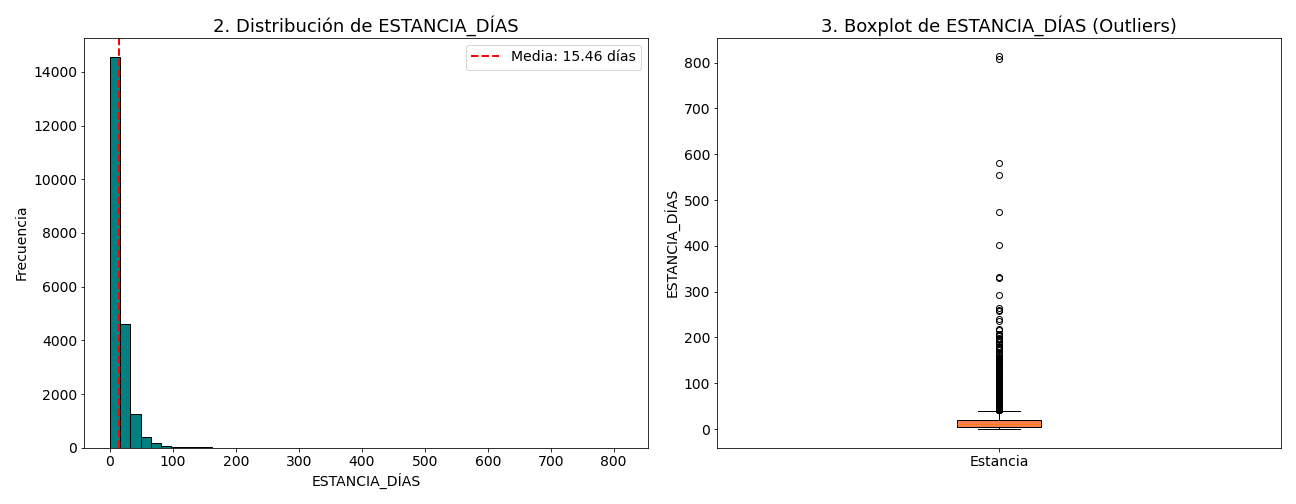

In [4]:
# Requisito 1: Estudio Estadístico Elemental (Numérico)
print("\n--- 1.2 Estudio Estadístico de ESTANCIA_DÍAS ---")
dias_stats = df[DIAS].describe().round(2)
print(dias_stats)

# Requisito 1: Frecuencias Categóricas
print("\nTop 5 COMUNIDAD_AUTÓNOMA (%\n", df[CCAA].value_counts(normalize=True).head(5).mul(100).round(2))
print("\nTop 5 DIAGNÓSTICO_PRINCIPAL (%\n", df[DIAG].value_counts(normalize=True).head(5).mul(100).round(2))

# Gráficos 2 y 3: Distribución (Histograma) y Outliers (Boxplot)
plt.figure(figsize=(18, 7))

# Gráfico 2: Histograma
plt.subplot(1, 2, 1)
plt.hist(df[DIAS].dropna(), bins=50, color='teal', edgecolor='black')
plt.axvline(dias_stats['mean'], color='red', linestyle='dashed', linewidth=2, label=f'Media: {dias_stats["mean"]} días')
plt.title('2. Distribución de ESTANCIA_DÍAS', fontsize=18)
plt.xlabel(DIAS, fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend()

# Gráfico 3: Boxplot (Requisito 4: Outliers)
plt.subplot(1, 2, 2)
plt.boxplot(df[DIAS].dropna(), patch_artist=True, boxprops=dict(facecolor='coral'))
plt.title('3. Boxplot de ESTANCIA_DÍAS (Outliers)', fontsize=18)
plt.ylabel(DIAS, fontsize=14)
plt.xticks([1], ['Estancia'])

plt.tight_layout()
plt.savefig('graficos_2_estancia_outliers.png') 
plt.show()

--- 3. Sección 2: Ingeniería de Características ---
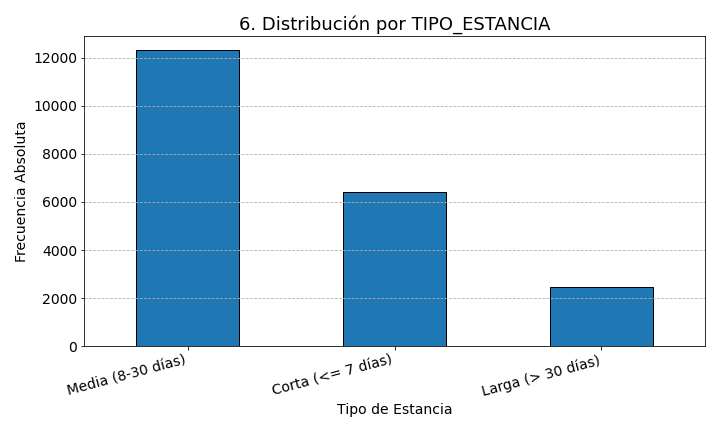

In [3]:
print("--- 3. Sección 2: Ingeniería de Características ---")

# --- (A) INGENIERÍA DE EDAD ---
# Conversión de fecha y corrección de siglo
df['FECHA_TEMP'] = pd.to_datetime(df[FN], format='%d/%m/%y', errors='coerce') 
ahora = pd.to_datetime('now')
df['FECHA_CORREGIDA'] = df['FECHA_TEMP'].apply(
    lambda fecha: fecha - pd.DateOffset(years=100) if fecha > ahora else fecha
)
dias_vividos = (ahora - df['FECHA_CORREGIDA']).dt.days
df['EDAD_CALCULADA'] = (dias_vividos / 365.25).astype(int)
bins = [0, 17, 30, 50, 65, df['EDAD_CALCULADA'].max() + 1]
labels = ['0-17 (Niño/Adolescente)', '18-30 (Joven)', '31-50 (Adulto)', '51-65 (Adulto Mayor)', '65+ (Anciano)']
df['GRUPO_ETARIO'] = pd.cut(df['EDAD_CALCULADA'], bins=bins, labels=labels, right=False)

# --- (B) INGENIERÍA DE ESTANCIA (Para la VISTA_MUY_INTERESANTE) ---
df['TIPO_ESTANCIA'] = pd.cut(
    df[DIAS],
    bins=[0, 7, 30, df[DIAS].max() + 1],
    labels=['Corta (<= 7 días)', 'Media (8-30 días)', 'Larga (> 30 días)'],
    right=False
)

# --- (C) INGENIERÍA DE DIAGNÓSTICO (Para la VISTA_MUY_INTERESANTE) ---
df['CODIGO_DIAGNOSTICO_GRUPO'] = df[DIAG].astype(str).str[:3]

# Gráfico 6: Justificación visual de la ingeniería (Sin Seaborn)
estancia_counts = df['TIPO_ESTANCIA'].value_counts()

plt.figure(figsize=(10, 6))
estancia_counts.plot(kind='bar', color='tab:blue', edgecolor='black')
plt.title('6. Distribución por TIPO_ESTANCIA', fontsize=18)
plt.xlabel('Tipo de Estancia', fontsize=14)
plt.ylabel('Frecuencia Absoluta', fontsize=14)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.savefig('grafico_6_ingenieria_estancia.png')
plt.show()

print("\nIngeniería de Características finalizada.")

--- 3.2 Análisis de Correlación (Estancia vs. Edad) ---
La correlación de Pearson entre Estancia y Edad es: 0.0794
Una correlación cercana a 0.0 indica que NO hay una relación lineal fuerte. La estancia no depende linealmente de la edad.
<stdin>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
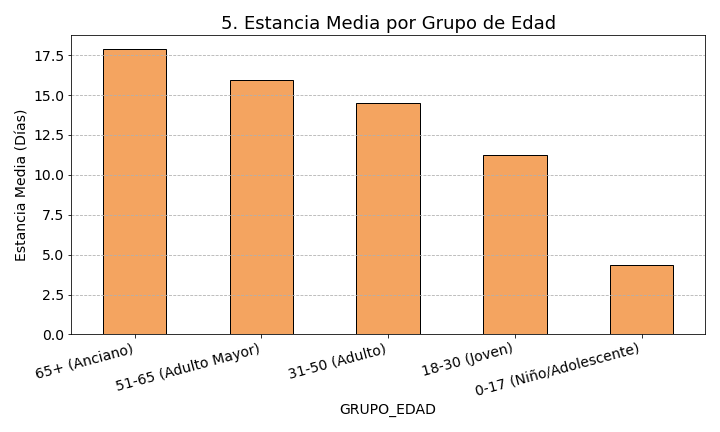
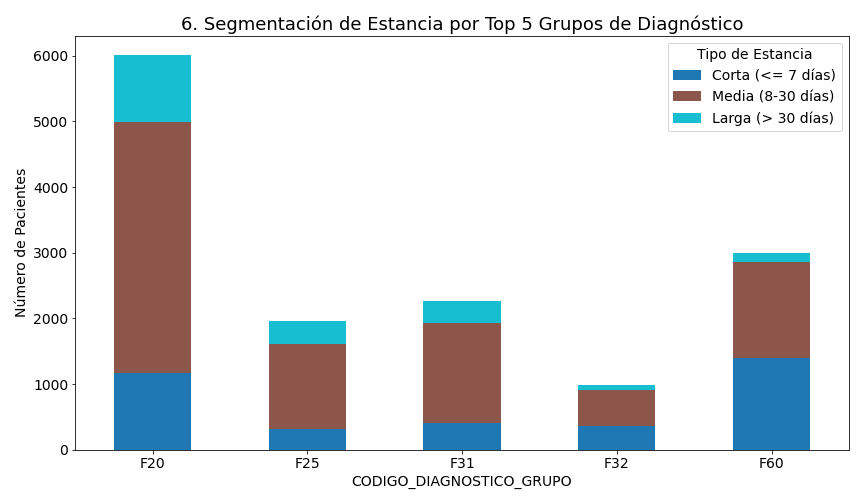

In [4]:
print("\n--- 3.2 Análisis de Correlación (Estancia vs. Edad) ---")
# Cálculo del Coeficiente de Correlación (Pearson)
correlacion_estancia_edad = df[['ESTANCIA_DÍAS', 'EDAD_CALCULADA']].corr().iloc[0, 1]
print(f"La correlación de Pearson entre Estancia y Edad es: {correlacion_estancia_edad:.4f}")
print("Una correlación cercana a 0.0 indica que NO hay una relación lineal fuerte. La estancia no depende linealmente de la edad.")

# Gráfico 5: Análisis de ESTANCIA por GRUPO ETARIO (Justificación de la Ingeniería)
estancia_por_grupo = df.groupby('GRUPO_ETARIO')['ESTANCIA_DÍAS'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
estancia_por_grupo.plot(kind='bar', color='sandybrown', edgecolor='black')
plt.title('5. Estancia Media por Grupo de Edad', fontsize=18)
plt.ylabel('Estancia Media (Días)', fontsize=14)
plt.xlabel('GRUPO_EDAD', fontsize=14)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('grafico_5_estancia_vs_edad.png')
plt.show()

# Gráfico 6: Top 5 Diagnósticos por Tipo de Estancia (Pivote y Segmentación)
top_diagnosticos = df['CODIGO_DIAGNOSTICO_GRUPO'].value_counts().head(5).index
df_filtrado = df[df['CODIGO_DIAGNOSTICO_GRUPO'].isin(top_diagnosticos)]

conteo_pivote = df_filtrado.groupby('CODIGO_DIAGNOSTICO_GRUPO')['TIPO_ESTANCIA'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
conteo_pivote.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())
plt.title('6. Segmentación de Estancia por Top 5 Grupos de Diagnóstico', fontsize=18)
plt.ylabel('Número de Pacientes', fontsize=14)
plt.xlabel('CODIGO_DIAGNOSTICO_GRUPO', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Tipo de Estancia')
plt.tight_layout()
plt.savefig('grafico_6_segmentacion_estancia.png')
plt.show()

print("\nAnálisis avanzado de correlación y segmentación finalizado.")